In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
import seaborn as sns
from sklearn import linear_model

#mpl.rcParams['figure.figsize'] = (12, 5)
#figsize = (10,4)
figsize = (16,5)

# Часть 1. Теорема Байеса

>    1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

Обозначим К - событие "кровь подсудимого принадлежит редкой группе", Н - "подсудимый невиновен", В - "подсудимый виновен".
Тогда прокурор из правильной посылки P(K|Н) = 1% делает неправильный вывод P(B|K) = 1 - P(Н|К) =(?) 99%, т.к. из P(K|Н) вовсе не следует P(Н|К), т.е. $$P(K|Н) \neq P(Н|К)$$
Прокурор должен был оценить P(B|K) = 1 - P(Н|К), т.е. апостериорную вероятность виновности/невиновности при наличии новой улики - совпадении группы крови.
По формуле Байеса $$P(В|К) = \frac{P(K|В)P(В)}{P(K)}=\frac{P(K|В)P(В)}{P(K|В)P(В)+P(K|Н)P(Н)}$$
Преобразуем, учитывая, что P(K|В) = 1 (кровь принадлежит убийце)
$$P(В|К)=\frac{P(В)}{P(В)+P(К|Н)P(Н)}=\frac{1}{1+P(K|Н)\frac{P(Н)}{P(В)}}=\frac{1}{1+0.01\frac{P(Н)}{P(В)}}$$
Здесь P(В), P(Н) = 1 - P(В) - априорные вероятности виновности/невиновности подсудимого, основанная на других уликах. Таким образом, апостериорная вероятность виновности будет близка к 1, если другие улики дают сколько-то значимую априорную вероятность 

Text(0.5, 1.0, 'p_poster(p_prior) depends on p_blood (0:1)')

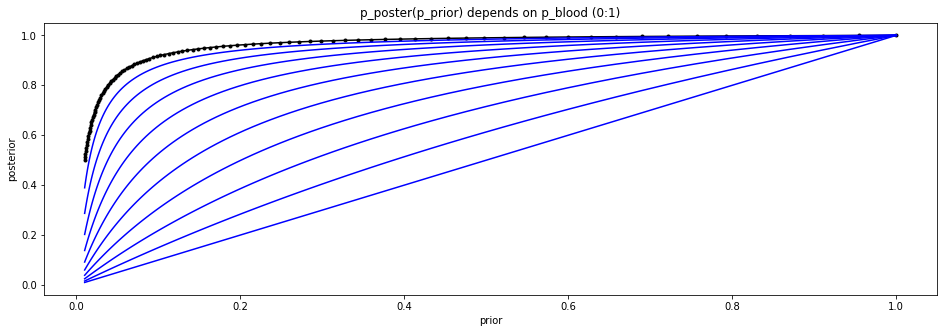

In [2]:
p_blood = 0.01
p_prior = np.logspace(-2., 0., num=100) #np.arange(0.01,1,0.01)
p_poster = 1/(1 + p_blood*(1-p_prior) / p_prior)

plt.figure(figsize=figsize)
plt.plot(p_prior, p_poster, '-k.')
for p_blood in np.logspace(-1.8, 0., num=10):# np.arange(0.02,1,0.01):
    p_poster = 1 / (1 + p_blood * (1 - p_prior) / p_prior)
    plt.plot(p_prior, p_poster, '-b')
plt.xlabel('prior')
plt.ylabel('posterior')
plt.title('p_poster(p_prior) depends on p_blood (0:1)')

>2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Адвокат оценил вероятность того, что случайный человек с определенной группой крови совершил конкретное убийство. Конечно, такая вероятность ничтожна мала, т.к. из этих 10000 чел большинство имеют алиби и никак не связаны с убийством. Т.е. нельзя судить о виновности только по группе крови.
По честному адвокат должен был оценить вероятность того, что подозреваемый с данной группой крови совершил убийство. Если выбирать из числа подозреваемых, то группа крови очень сокращает их число и увеличивает вероятность виновности подсудимого весьма значительно.

>    3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?



Обозначим 
$$P(positive|healthy) = fp, P(negative|healthy) = tn = 1 - fp$$
$$P(negative|sick) = fn, P(positive|sick) = tp = 1 - fn$$

Тогда вероятность болезни после положительного теста
$$P(sick|positive) = \frac{P(positive|sick)P(sick)}{P(positive)}=\frac{P(positive|sick)P(sick)}{P(positive|sick)P(sick) + P(positive|healthy)P(healthy)}= \frac{(1-fn)P(sick)}{(1-fn)P(sick) + fp(1-P(sick))} = \frac{1}{1+\frac{fp}{1-fn}\frac{1-P(sick)}{P(sick)}}=\frac{1}{1+99\frac{fp}{1-fn}}$$
Хотим, чтобы вероятность определения болезни при положительном тесте была как можно ближе к 1, значит отношение fp/(1-fn) -> min должно быть как можно меньше. Видно, что это отношение прямо пропорционально fp и не сильно зависит от fn.
Построим график зависимости P(positive|sick) от fp:

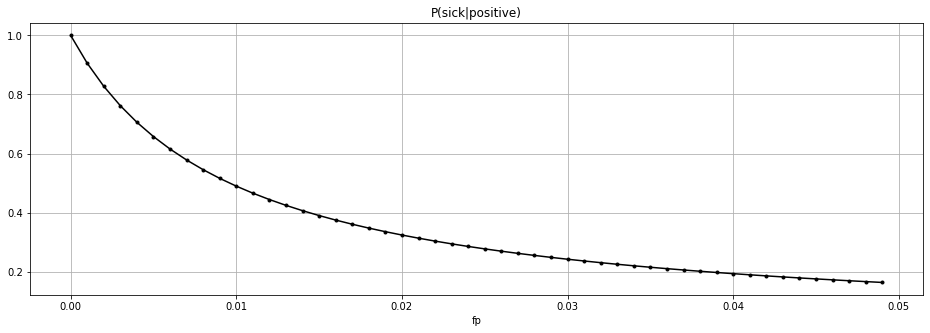

In [3]:
prior_sick = 0.01
fn = 0.05
fp = np.arange(0,0.05,0.001)
posterior_sick_positive = 1 / ( 1 + fp/(1-fn) * (1-prior_sick)/prior_sick )
plt.figure(figsize=figsize)
plt.plot(fp, posterior_sick_positive, '-k.')
plt.xlabel('fp')
plt.title('P(sick|positive)')
plt.grid()

Далее построим контурный график от двух переменных fp и fn, из которого видно, что зависимость от fn незначительна

Text(0.5, 1.0, 'P(sick|positive)')

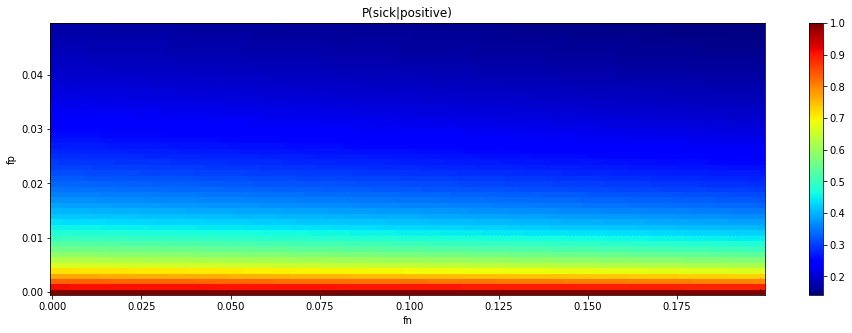

In [4]:
fp, fn = np.meshgrid(np.arange(0,0.05,0.001), np.arange(0,0.2,0.001))
posterior_sick_positive = 1 / ( 1 + fp/(1-fn) * (1-prior_sick)/prior_sick )

plt.figure(figsize=figsize)
#plt.contourf(fn, fp, posterior_sick_positive, 20, cmap=plt.cm.jet)
plt.pcolormesh(fn, fp, posterior_sick_positive, cmap=plt.cm.jet, shading='auto')
plt.colorbar()
plt.xlabel('fn')
plt.ylabel('fp')
plt.title('P(sick|positive)')

Найдем апостериорной вероятность болезни после отрицательного теста 
$$P(sick|negative) =\frac{P(negative|sick)P(sick)}{P(negative|sick)P(sick) + P(negative|healthy)P(healthy)} = \frac{fn \cdot P(sick)}{(fn \cdot P(sick) + (1-fp)(1-P(sick))}= \frac{1}{1+\frac{1-fp}{fn}\frac{1-P(sick)}{P(sick)}}= \frac{1}{1+99\frac{1-fp}{fn}}$$
Эту вероятность желательно сводить к 0: P(sick|negative) -> 0, увеличивая знаменатель. В знаменателе при отношении (1-fp)/fn стоит довольно большой множитель 99 - априорная вероятность здоровья, при этом слагаемое обратно пропорционально fn. Таким образом, вероятность ошибочного отрицального теста и так довольна мала.
Построим зависимость от fn

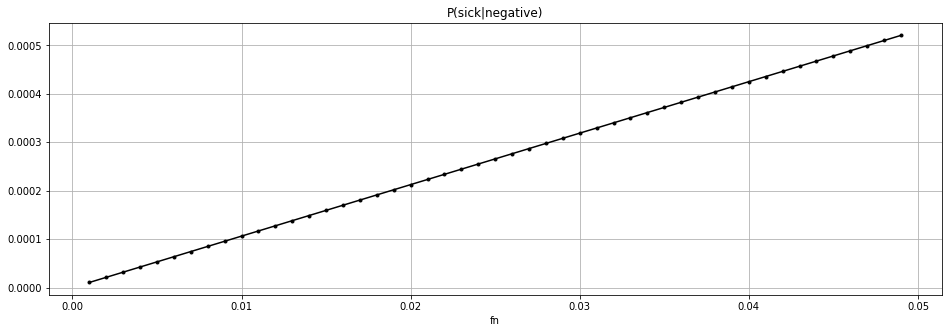

In [5]:
fp = 0.05
fn = np.arange(0.001,0.05,0.001)
posterior_sick_negative = 1 / ( 1 + (1-fp)/fn * (1-prior_sick)/prior_sick )

plt.figure(figsize=figsize)
plt.plot(fn, posterior_sick_negative, '-k.')
plt.xlabel('fn')
plt.title('P(sick|negative)')
plt.grid()

Таким образом, видно, что вероятность ошибочного невыявления болезни P(sick|negative) незначительна по сравнению с вероятностью ошибочного выявления P(healthy|positive) = 1 - P(sick|positive).
Врачам следует в первую очередь уменьшать число false positives, т.е. P(positive|healthy).

# Часть 2. Линейная регрессия

> 1. Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [6]:
#df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv',usecols=['iso_code','date','total_cases'],parse_dates=['date'])
df = pd.read_csv('owid-covid-data.csv',
                 usecols=['iso_code','date','total_cases','new_cases','new_tests'],
                 parse_dates=['date'])
#df.info()

In [7]:
df = df[df['iso_code'] == 'RUS']
df = df[df['date'] >= '2020-03-03'].reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        356 non-null    int64         
 1   iso_code     356 non-null    object        
 2   date         356 non-null    datetime64[ns]
 3   total_cases  356 non-null    float64       
 4   new_cases    356 non-null    float64       
 5   new_tests    328 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 16.8+ KB


In [8]:
assert (df.total_cases.diff().fillna(0) == df.new_cases).all()

In [9]:
train_idx = np.arange(50)
test_idx = np.arange(50, len(df))
pred_idx = np.arange(len(df))

> 2. Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

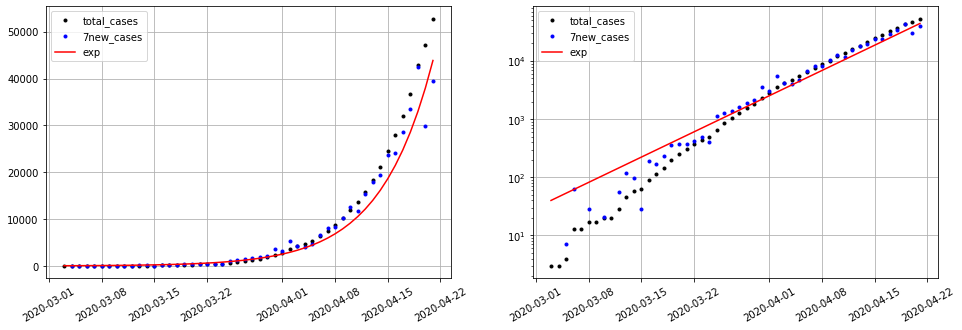

In [10]:
t = df.date[train_idx]
y = df.total_cases[train_idx]
fig = plt.figure(figsize=figsize)
for ax in fig.subplots(1, 2):
    ax.plot(t, y, 'k.', label='total_cases')
    ax.plot(t, 7 * y.diff(), 'b.', label='7new_cases')
    ax.plot(t, 40*np.exp(train_idx / 7.), 'r', label='exp')
    ax.grid(True)
    ax.xaxis.set_tick_params(rotation=30, labelsize=10)
    ax.legend(fontsize=10)
fig.axes[1].set_yscale('log')


На обучающих данных видим экспоненциальный рост, количество новых случаев имеет ту же форму, что и общее количество случаев, т.е. y ≈ 7dy -> y ≈ k*exp(t/7). Правый график показывает данные в логарифмической шкале, из него видно, что показатель экспоненты скорее квадратичная функция времени, чем линейная.

>         a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.
        b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).
        c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).
        
Подготовим необходимые фукнции и классы для расчетов

In [11]:
# функция расчета параметров апостериорного распределения по априорному и данным
def bayesian_update(mu, sigma, X, y, sigma_noise):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(X), X) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), mu.T) + (1 / (sigma_noise ** 2)) * np.matmul(X.T, y ) )
    return mu_n, sigma_n

In [12]:
# Модель линейной регресии для полиномиальной зависимости от времени
class PolynomRegression:
    def __init__(self, deg=2, alpha=0):
        self._alpha = alpha
        self._deg = max(deg, 0)
        self._m = linear_model.Ridge(alpha=alpha, fit_intercept=False)
        
    def fit(self, t, y, bayes=True):
        assert len(t) == len(y)
        X = np.array([t**d for d in range(self._deg, -1, -1)]).T
        #X = np.array([t**2, t, np.ones_like(t)]).T
        self._m.fit(X, y)
        w = np.linalg.inv(X.T.dot(X) + self._alpha*np.eye(self._deg + 1)).dot(X.T).dot(y)
        assert np.linalg.norm(self._m.coef_ - w) < 1e-10, f'coef_={self._m.coef_}, w={w}'
        print(f'w={w}')
        
        if bayes:
            err = y - X.dot(self._m.coef_)
            sigma_noise = err.std() #np.sqrt((err**2).mean())
            #assert np.abs(sigma_noise - err.std()) < 1e-3*err.max(), f'sigma_noise={sigma_noise}, std={err.std()}'
            print(f'sigma_noise={sigma_noise}')

            mu_prior, sigma_prior = np.zeros(self._deg + 1), self._deg * np.eye(self._deg + 1) 
            mu_posterior, sigma_posterior = bayesian_update(mu_prior, sigma_prior, X, y, sigma_noise)
            print(f'mu_posterior={mu_posterior}')
            #print(f'sigma_posterior={sigma_posterior}')

            mu_cur, sigma_cur = mu_prior, sigma_prior
            mu_list, sigma_list = [], []
            for i in range(len(t)):
                mu_cur, sigma_cur = bayesian_update(mu_cur, sigma_cur, np.array([X[i,:]]), np.array([y[i]]), sigma_noise)
                mu_list.append(mu_cur)
                sigma_list.append(sigma_cur)
            assert np.linalg.norm(mu_cur - mu_posterior) < 1e-10
            assert np.linalg.norm(sigma_cur - sigma_posterior) < 1e-10
            self.bayes = {
                'mu_posterior' : mu_posterior,
                'sigma_posterior' : sigma_posterior,
                'mu_update' : np.array(mu_list),
                'sigma_update' : np.array(sigma_list),
                         }
        
        return self
        
    def predict(self, t):
        #X = np.array([t**2, t, np.ones_like(t)]).T
        X = np.array([t**d for d in range(self._deg, -1, -1)]).T
        y = self._m.predict(X)
        assert np.linalg.norm(y - X.dot(self._m.coef_)) < 1e-10
                                                                
        return y
    
    def predict_samples(self, t, n_samples=10):
        X = np.array([t**d for d in range(self._deg, -1, -1)]).T
        w_samples = np.random.multivariate_normal(self.bayes['mu_posterior'], 
                                                  self.bayes['sigma_posterior'],
                                                  n_samples)
        y_samples = [X.dot(w) for w in w_samples]       
        return np.array(y_samples)        
        

In [13]:
def samples_plot(ax, x, y_samples, c='--k'):
    for y in y_samples:
        ax.plot(x, y, c, color="0.5")

In [14]:
def quant_bounds(data_samples, precition=0.5, axis=0):
    quant_range = np.array([1-precition, 1+precition])/2
    data_bounds = np.quantile(data_samples, quant_range, axis=axis)
    return data_bounds[0], data_bounds[1]

In [15]:
def plot_pred(fig, y, y_pred, y_pred_samples, y_stat_samples):
    for ax in fig.subplots(1, 2):
        samples_plot(ax, df.date[pred_idx], y_pred_samples)
        ax.fill_between(df.date[pred_idx],
                        *quant_bounds(y_stat_samples, 0.8),
                        color='c', alpha=.2, 
                        label="80% предсказаний")
        ax.fill_between(df.date[pred_idx],
                        *quant_bounds(y_stat_samples, 0.5),
                        color='m', alpha=.2, 
                        label="50% предсказаний")
        ax.plot(df.date[train_idx], y[train_idx], 'b.', label='train')
        ax.plot(df.date[test_idx],  y[test_idx],  'r.', label='test')
        ax.plot(df.date[pred_idx], y_pred, '-k', label='predict')
        ax.grid(True)
        ax.xaxis.set_tick_params(rotation=30, labelsize=10)
        ax.legend(fontsize=10)
    fig.axes[1].set_yscale('log')

Построим модель для общего количества случаев в виде экспоненциальной зависимости, показатель которой - квадратическая зависимость от времени

w=[-0.00171767  0.28245677  1.14741031]
sigma_noise=0.13996827854989488
mu_posterior=[-0.00172013  0.28260347  1.14558097]


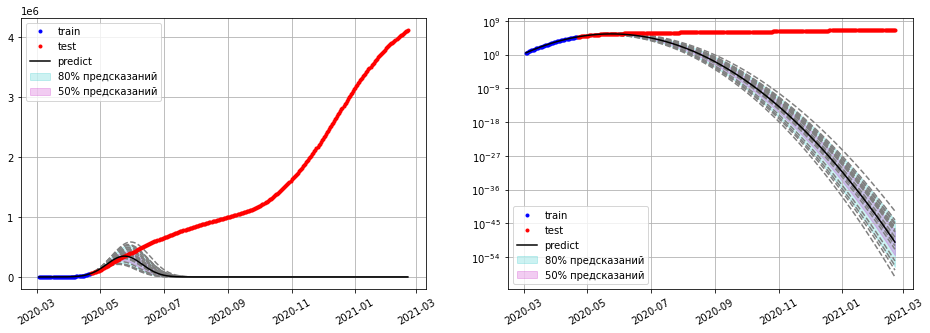

In [16]:
y = df.total_cases.values

model = PolynomRegression(deg = 2, alpha = 0).fit(train_idx, np.log(y[train_idx]))
y_pred = np.exp(model.predict(pred_idx))
y_pred_samples = np.exp(model.predict_samples(pred_idx, 20))
y_stat_samples = np.exp(model.predict_samples(pred_idx, 1000))

fig = plt.figure(figsize=figsize)
plot_pred(fig, y, y_pred, y_pred_samples, y_stat_samples)

Из графиков видно, что обучающие данные хорошо описываются моделью, а предсказания модели сначала растут, а затем экспоненциально уменьшаются к нулю, в то время как реальные данные все время увеличиваются. 
Пик предсказаний приходится на 24 мая (83-й день), т.е. в принципе 30 тестовых дней после 50 обучающих модель предсказывает неплохо.

Text(0.5, 1.0, 'Зависимость апостериорных параметров модели от количества обучающих данных')

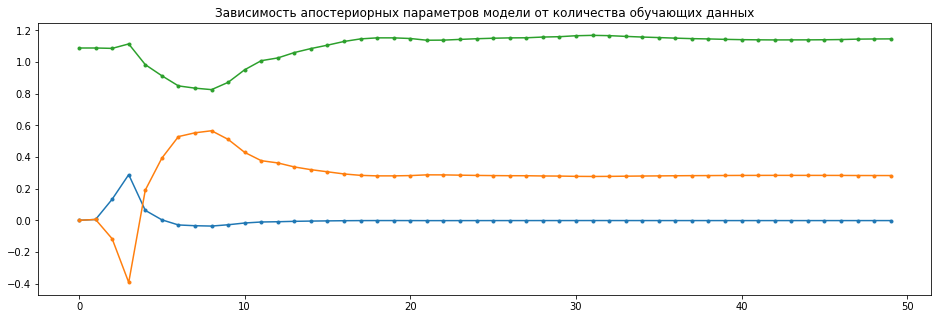

In [17]:
plt.figure(figsize=figsize)
plt.plot(train_idx, model.bayes['mu_update'],'.-')
plt.title('Зависимость апостериорных параметров модели от количества обучающих данных')

In [18]:
def day_pred(y, y_pred, y_stat_samples, day = '2020-05-01'):
    i = df.date[df.date == day].index.values[0]
    yi_pred = y_pred[i]
    pred_q = np.quantile(y_stat_samples, np.array([0.1, 0.9]), axis=0)
    pred_qi = pred_q[:,i].astype(int)
    val = lambda x: int(x / 1000)
    print(f'На {day}:\n       факт: {val(y[i])}тыс, модель: {val(y_pred[i])}тыс')
    print(f'      оптимист: {val(pred_qi[0])}тыс, пессимист:{val(pred_qi[1])}тыс, ratio: {pred_qi[1] / pred_qi[0] :.2f}')

In [19]:
day_pred(y, y_pred, y_stat_samples, '2020-05-01')

На 2020-05-01:
       факт: 114тыс, модель: 137тыс
      оптимист: 118тыс, пессимист:156тыс, ratio: 1.33


> 3. Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана

В предыдущей модели предсказания стремились к 0, если такую же модель построить для производной, то проинтегрировав получим сигмоиду

w=[-0.00183523  0.27258166 -0.27140591]
sigma_noise=0.2890221305906475
mu_posterior=[-0.00182232  0.27177604 -0.26044063]


(0.0, 3000000.0)

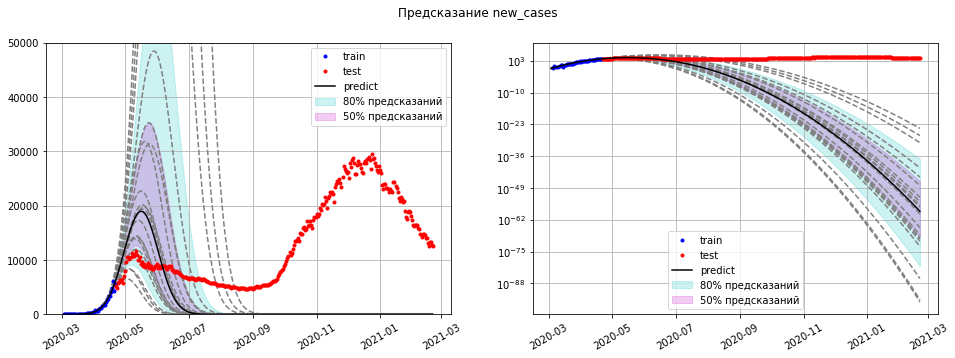

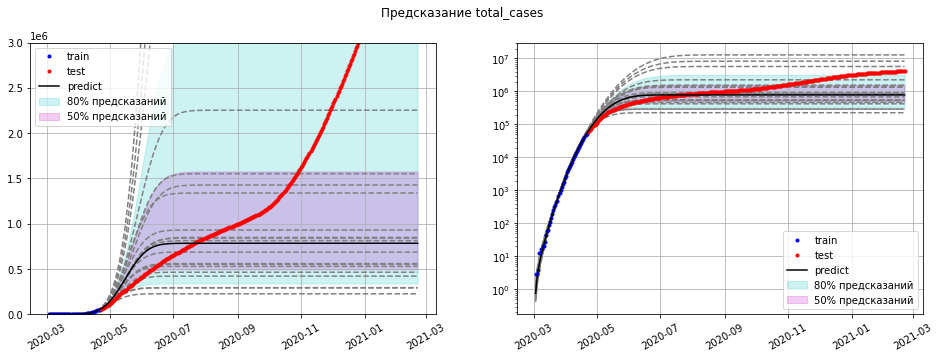

In [20]:
y = df.total_cases.values

dy = df.total_cases.diff().fillna(0).values
model = PolynomRegression(deg = 2, alpha = 0).fit(train_idx[9:], np.log(dy[train_idx[9:]]))

dy_pred = np.exp(model.predict(pred_idx))
dy_pred_samples = np.exp(model.predict_samples(pred_idx, 20))
dy_stat_samples = np.exp(model.predict_samples(pred_idx, 1000))

fig = plt.figure(figsize=figsize)
plot_pred(fig, dy, dy_pred, dy_pred_samples, dy_stat_samples)
fig.suptitle('Предсказание new_cases')
fig.axes[0].set_ylim([0, 5e4])

y_pred = np.cumsum(dy_pred)
y_pred_samples = np.cumsum(dy_pred_samples, axis=1)
y_stat_samples = np.cumsum(dy_stat_samples, axis=1)

fig = plt.figure(figsize=figsize)
plot_pred(fig, y, y_pred, y_pred_samples, y_stat_samples)
fig.suptitle('Предсказание total_cases')
fig.axes[0].set_ylim([0, 3e6])

In [21]:
day_pred(y, y_pred, y_stat_samples, '2020-05-01')
day_pred(y, y_pred, y_stat_samples, '2020-06-01')
day_pred(y, y_pred, y_stat_samples, '2020-09-01')

На 2020-05-01:
       факт: 114тыс, модель: 145тыс
      оптимист: 118тыс, пессимист:182тыс, ratio: 1.54
На 2020-06-01:
       факт: 414тыс, модель: 656тыс
      оптимист: 319тыс, пессимист:1619тыс, ratio: 5.06
На 2020-09-01:
       факт: 997тыс, модель: 784тыс
      оптимист: 339тыс, пессимист:3169тыс, ratio: 9.34


Из графиков видно, что горизонт полезного прогноза увеличился

> Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?

На большие горизонты прогноза прогнозировать сложно, тем более что начальный процесс весьма отличается по своей динамике от последующего - это и так понятно. А вот как определять интервалы прогноза и распределение параметров модели - интересно было узнать и посмотреть, как они зависят от горизонта прогноза.

Про коронавирус сложно что-либо сказать, опираясь только на статистические данные. Однако модели показали ограниченный рост заболеваемости и это радует.

В свете первого задания интересно, как точность тестирования повлияла на статистику заболеваемости. Особенно если вспомнить, что по новостям промелькивало, что около половины случаев протекает бессимптомно. Может это как раз и были ложноположительные случаи?

Построим графики новых случаев и количества тестов, чтобы увидеть, зависимость между ними.

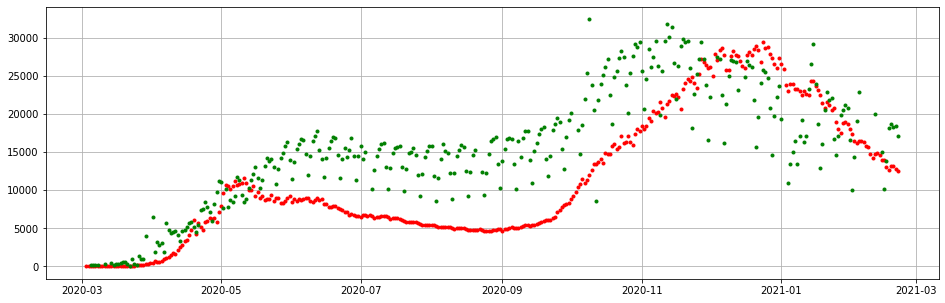

In [22]:
idx = np.arange(len(df))
plt.figure(figsize=figsize)
plt.plot(df.date[idx], df.new_cases[idx],'r.', df.date[idx], 0.05*df.new_tests[idx],'g.')
plt.grid()

Даже не знаю, то ли число заболевших зависит от числа тестов, то ли наоборот - тесты делают в зависимости от ожидаемого числа больных.